# Feature Extraction

## One Ellipse
In 2D space with 2 features, represent instances as dots.  
An ellipse encircles most of the data.  
Center = centroid = data mean.  
$\Sigma$ = covariance matrix.  
$\lambda_i$ = eigenvalues of covariance matrix.  
Each ellipse radius has length $\sqrt(\lambda_i)$.  
Each ellipse diameter has length $2\sqrt(\lambda_i)$.  

### Scatter matrix
Scatter matrix = $\sum[(\mu-x_k)(\mu-x_k)^T]$.  
Scatter matrix = outer product (u-x) * (u-x).  
For d dimensional data, scatter matrix size is (d x d).   
The (scatter matrix)/n is the maximum likelihood estimate of the covariance matrix, assuming normality.  

Note similarity to covariation matrix.  
cov(X,Y) = $\sigma(X,Y) = (1/n)\sum_1^n[(\mu_{x}-x)(\mu_{y}-y)^T]$  

Matrix M is positive definite if $z^TMz$ is positive for all real column vectors z.  
Matrix M is positive semi-definite if $z^TMz$ is non-negative for all real column vectors z.  
The scatter matrix is positive semi-definite.   

See wikipedia [scatter matrix](https://en.wikipedia.org/wiki/Scatter_matrix)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
def scatter_matrix(X):
    """For 100 points in 2D space, X has size=(100,2)"""
    instances = X.shape[0]
    features = X.shape[1]
    means = np.mean(X)  # vector of feature means
    sm = np.zeros( (features,features) )
    for i in range(instances):
        deviation = means-X[i] # vector of feature deviations
        outer_product = np.outer(deviation,deviation)
        sm += outer_product
    return sm
        

Scatter matrix
[[25530.1425 -1616.4225]
 [-1616.4225 23166.0125]]
ML estimate of Covariance matrix
[[255.301425 -16.164225]
 [-16.164225 231.660125]]
Numpy estimate of Covariance matrix
[[247.17818182  -5.62545455]
 [ -5.62545455 223.29808081]]


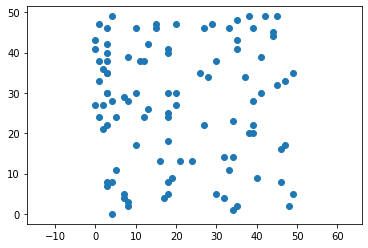

In [3]:
# One hundred uniformly scattered points.
N = 100
x = np.random.randint(0, 50, N)
y = np.random.randint(0, 50, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

Scatter matrix
[[5044.62830766  -97.3803762 ]
 [ -97.3803762   169.39404935]]
ML estimate of Covariance matrix
[[25.22314154 -0.48690188]
 [-0.48690188  0.84697025]]
Numpy estimate of Covariance matrix
[[25.34076813 -0.48022576]
 [-0.48022576  0.84210352]]


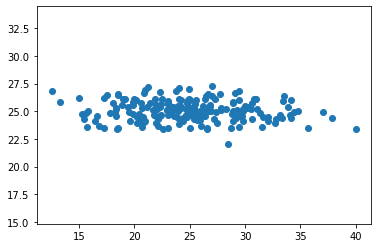

In [4]:
# Multivariate gaussian.
N = 200
mu = 25
sigma_x = 5
sigma_y = 1
x = np.random.normal(mu, sigma_x, N)
y = np.random.normal(mu, sigma_y, N)
xy = np.asarray(list(zip(x, y)))  # N rows of (x,y)
sm = scatter_matrix(xy)
print('Scatter matrix')
print(sm)
mlcov = sm/N
print('ML estimate of Covariance matrix')
print(mlcov)
print('Numpy estimate of Covariance matrix')
obs = np.array( [x,y] )   # row of x values, row of values
print(np.cov(obs))

plt.scatter(x, y)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

## Synthesis
### Generate two ellipsoid distributions

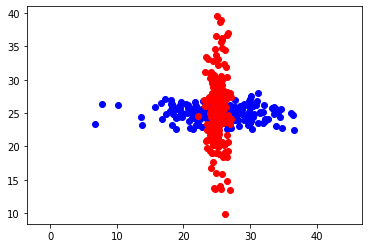

In [5]:
N = 200
half=int(N)
mu = 25
sigma_x = 5
sigma_y = 1
x = np.random.normal(mu, sigma_x, half)
y = np.random.normal(mu, sigma_y, half)
plt.scatter(x, y, color='blue')
sigma_x = 1
sigma_y = 5
x = np.random.normal(mu, sigma_x, half)
y = np.random.normal(mu, sigma_y, half)
plt.scatter(x, y, color='red')
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()

### Combine the points
The challenge will be to disambiguate the 2 distributions and assign instances to each.  
(Unless we shuffle, this would be easy.) 

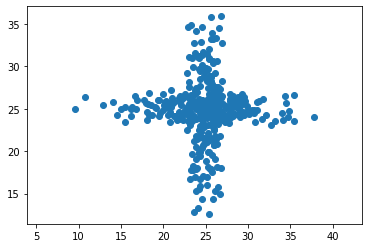

In [6]:
N = 200
half=int(N)
mu = 25
sigma_x = 5
sigma_y = 1
x1 = np.random.normal(mu, sigma_x, half)
y1 = np.random.normal(mu, sigma_y, half)
sigma_x = 1
sigma_y = 5
x2 = np.random.normal(mu, sigma_x, half)
y2 = np.random.normal(mu, sigma_y, half)
x = np.concatenate( (x1,x2) )
y = np.concatenate( (y1,y2) )
plt.scatter(x, y,)
plt.axis('equal')    # uniform aspect ratio, not same coords
plt.show()